In [28]:
import pandas ahttp://localhost:8888/notebooks/Untitled.ipynb#s pd
import numpy as np
from matplotlib import pyplot as plt

In [23]:
df = pd.read_json('winemag-data-130k-v2.json')

In [25]:
df.columns

Index(['points', 'title', 'description', 'taster_name',
       'taster_twitter_handle', 'price', 'designation', 'variety', 'region_1',
       'region_2', 'province', 'country', 'winery'],
      dtype='object')

In [26]:
df.shape

(129971, 13)

In [27]:
df.nunique()

points                       21
title                    118840
description              119955
taster_name                  19
taster_twitter_handle        15
price                       390
designation               37979
variety                     707
region_1                   1229
region_2                     17
province                    425
country                      43
winery                    16757
dtype: int64

(array([ 1089.,  4861., 16010., 29533., 29433., 26769., 16102.,  5293.,
          752.,   129.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 10 artists>)

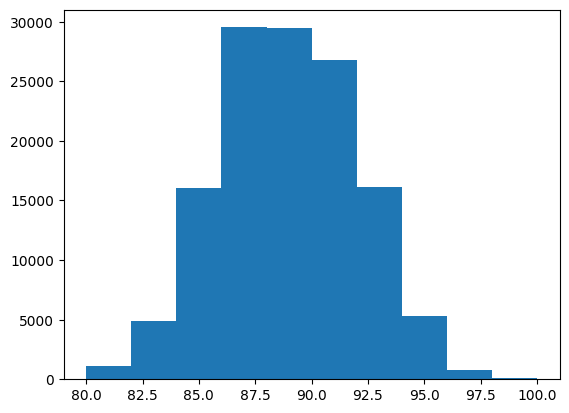

In [29]:
plt.hist(df['points'])

In [30]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [31]:
len(df.designation.unique())

37980

In [32]:
df.isnull().sum()

points                       0
title                        0
description                  0
taster_name              26244
taster_twitter_handle    31213
price                     8996
designation              37465
variety                      1
region_1                 21247
region_2                 79460
province                    63
country                     63
winery                       0
dtype: int64

In [44]:
# Let us work on stripping the titles of irrelevant information

In [45]:
#first, let's download the data again, just to concentrate on this!

In [49]:
df = df.drop_duplicates()

In [80]:
data = df.copy()

In [74]:
import string # "string" module is already installed with Python
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [76]:
        
data['description_clean'] = data['description_clean'].str.replace('[^\w\s]','')

/tmp/ipykernel_13308/4280249096.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['description_clean'] = data['description_clean'].str.replace('[^\w\s]','')


In [77]:
data['description_clean']

0         Aromas include tropical fruit broom brimstone ...
1         This is ripe and fruity a wine that is smooth ...
2         Tart and snappy the flavors of lime flesh and ...
3         Pineapple rind lemon pith and orange blossom s...
4         Much like the regular bottling from  this come...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Welldrained gravel soil gives this wine its cr...
129969    A dry style of Pinot Gris this is crisp with s...
129970    Big rich and offdry this is powered by intense...
Name: description_clean, Length: 119988, dtype: object

In [81]:
def basic_cleaning(sentence):
    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())
    
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') 
    
    sentence = sentence.strip()
    
    return sentence

In [82]:
data['description_clean'] = data['description']
data['description_clean'] = data['description_clean'].apply(lambda text: basic_cleaning(text))

In [83]:
data['description_clean']

0         aromas include tropical fruit broom brimstone ...
1         this is ripe and fruity a wine that is smooth ...
2         tart and snappy the flavors of lime flesh and ...
3         pineapple rind lemon pith and orange blossom s...
4         much like the regular bottling from  this come...
                                ...                        
129966    notes of honeysuckle and cantaloupe sweeten th...
129967    citation is given as much as a decade of bottl...
129968    welldrained gravel soil gives this wine its cr...
129969    a dry style of pinot gris this is crisp with s...
129970    big rich and offdry this is powered by intense...
Name: description_clean, Length: 119988, dtype: object

In [84]:
# YOUR CODE HERE
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english'))

def stop_word_remover(text):
    tokens = word_tokenize(text)
    tokens_cleaned = [w for w in tokens if not w in stop_words] 
    text = ' '.join(word for word in tokens_cleaned)
    return text


In [85]:
data['description_clean'] = data['description_clean'].apply(lambda text: stop_word_remover(text))

In [86]:
data['description_clean']

0         aromas include tropical fruit broom brimstone ...
1         ripe fruity wine smooth still structured firm ...
2         tart snappy flavors lime flesh rind dominate g...
3         pineapple rind lemon pith orange blossom start...
4         much like regular bottling comes across rather...
                                ...                        
129966    notes honeysuckle cantaloupe sweeten delicious...
129967    citation given much decade bottle age prior re...
129968    welldrained gravel soil gives wine crisp dry c...
129969    dry style pinot gris crisp acidity also weight...
129970    big rich offdry powered intense spiciness roun...
Name: description_clean, Length: 119988, dtype: object

In [2]:
# Lemmatize?
data['winery'].unique()

NameError: name 'data' is not defined

In [3]:
data.columns()

NameError: name 'data' is not defined